If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [10]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt # data visualization library
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# PCA Faces

In [3]:
from sklearn.datasets import fetch_olivetti_faces
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

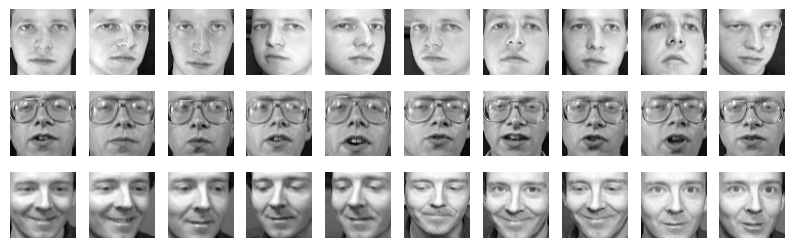

In [47]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [5]:
D = faces.data
D.shape

(400, 4096)

### Exercise 1a
plot the principal PC6 to PC9 components as images

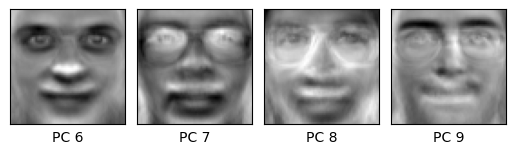

In [73]:
# Standardize the data
#scaler = StandardScaler()
#D_scaled = scaler.fit_transform(D) 
# Why not scale the data
# Confirm if PC8 is correct

svd = TruncatedSVD(n_components=9)
svd.fit_transform(D)

# Plot principal components PC5 to PC8 as images
n_components_to_plot = 4  # Set the number of principal components to plot
fig, axes = plt.subplots(1, n_components_to_plot,
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(n_components_to_plot):
    axes[i].imshow(svd.components_[i + 5].reshape(64, 64), cmap='gray')  # Adjust index for PC5 to PC8
    axes[i].set_xlabel(f'PC {i + 6}', fontsize=10)  # Label for PC5 to PC8

### Exercise 1b
Compute a PCA of dimension $r=3$. What are the coordinates of the low-dimensional representation of the 5th datapoint (having Python index 4)? 

In [93]:
# Add mean???

svd = TruncatedSVD(n_components=3)
D_pca = svd.fit_transform(D)

D_pca[4]

array([39.84367  , -2.4395785,  3.0645337], dtype=float32)

### Exercise 1c

(-0.5, 63.5, 63.5, -0.5)

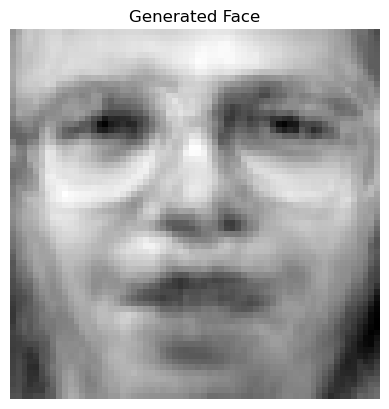

In [97]:
r = 50

scaler = StandardScaler()
D_scaled = scaler.fit_transform(D) 

svd = TruncatedSVD(n_components=r)
D_pca = svd.fit_transform(D)

# Generate a face using the specified coordinates
generated_coordinates = np.full(r, -0.5)  # Use coordinates {-0.5}^50
generated_face = np.dot(generated_coordinates, svd.components_) + scaler.mean_

# Plot the generated face
plt.imshow(generated_face.reshape(64, 64), cmap='gray')
plt.title("Generated Face")
plt.axis('off')